In [2]:
# basic python data handling analysis modules
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set()
import pickle, os, gc, re
# small utility functions
from utility import *

# interactive jupyter widgets!
# https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

In [3]:
Dataset_directory = ".."+os.sep+"Datasets"+os.sep

In [4]:
INT_df = pd.read_msgpack(Dataset_directory+"Processed"+os.sep+"INT_df_with_aggregate"+".msgpack")
tv_series_mislabelled_as_a_movie = INT_df[INT_df["TMB_tv_not_film"]==1].index
INT_df.drop(tv_series_mislabelled_as_a_movie,inplace=True)

In [5]:
INT_df_ord_only = pd.read_msgpack(Dataset_directory+"Processed"+os.sep+"INT_df_ord_only"+".msgpack")

In [6]:
ratings_cols = ['HETREC_rtAudienceScore', 'HETREC_rtAudienceNumRatings',
       'HETREC_rtTopCriticsNumReviews', 'HETREC_rtAllCriticsNumReviews',
       'ML_ratings_mean', 'SER_ratings_mean', 'TMB_vote_average_normalised',
       'HETREC_rtAllCriticsScore', 'PERS_ratings_mean', 'HETREC_ratings_mean',
       'TMB_vote_count', 'TMB_popularity_normalised',
       'SER_rating',"HETREC_rtTopCriticsScore",
        'HETREC_ratings_std','SER_ratings_std','PERS_ratings_std','ML_ratings_std']


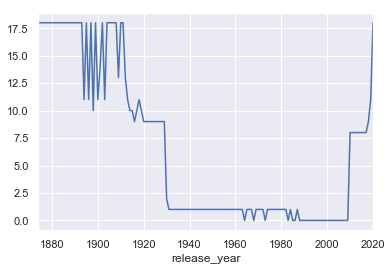

In [7]:
(INT_df.groupby("release_year")[ratings_cols].count()<10).sum(axis=1).plot()
# chop before

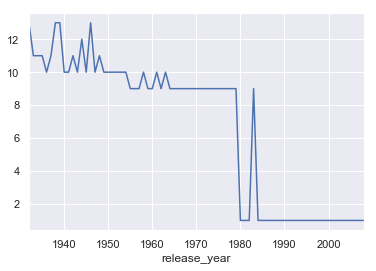

In [9]:
var0 = "release_year"
mask = (INT_df[var0]>1931) & (INT_df[var0]<2009)
(INT_df[mask].groupby("release_year")[ratings_cols].count()<100).sum(axis=1).plot()

Warning, filename truncated because it was over 50. Filenames may no longer be unique


C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:08:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1.09986
Will train until validation_0-rmse hasn't improved in 50.800000000000004 rounds.
[1]	validation_0-rmse:1.08522
[2]	validation_0-rmse:1.07226
[3]	validation_0-rmse:1.06188
[4]	validation_0-rmse:1.05046
[5]	validation_0-rmse:1.04169
[6]	validation_0-rmse:1.03343
[7]	validation_0-rmse:1.02615
[8]	validation_0-rmse:1.01785
[9]	validation_0-rmse:1.01139
[10]	validation_0-rmse:1.00439
[11]	validation_0-rmse:0.999053
[12]	validation_0-rmse:0.99331
[13]	validation_0-rmse:0.987725
[14]	validation_0-rmse:0.982912
[15]	validation_0-rmse:0.978742
[16]	validation_0-rmse:0.975305
[17]	validation_0-rmse:0.972381
[18]	validation_0-rmse:0.969518
[19]	validation_0-rmse:0.96613
[20]	validation_0-rmse:0.963015
[21]	validation_0-rmse:0.960338
[22]	validation_0-rmse:0.95844
[23]	validation_0-rmse:0.955901
[24]	valida

C:\ProgramData\Anaconda3\envs\Cook_Tortoise_Imdb_project\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:11:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


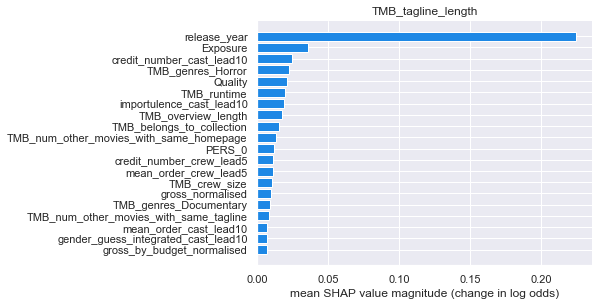

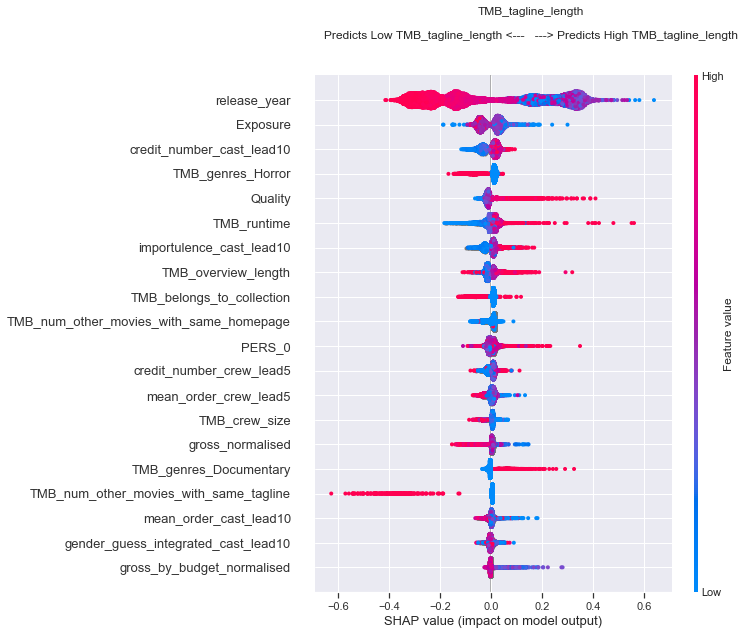

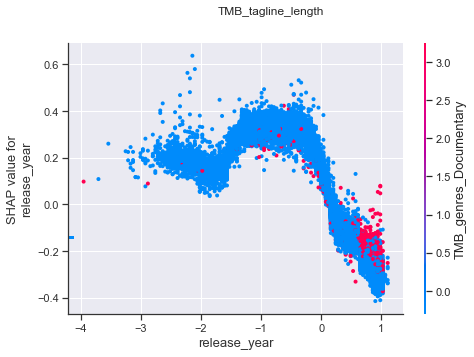

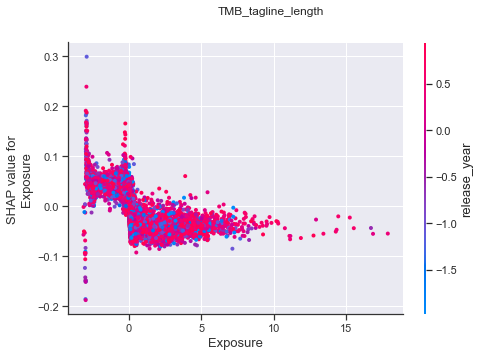

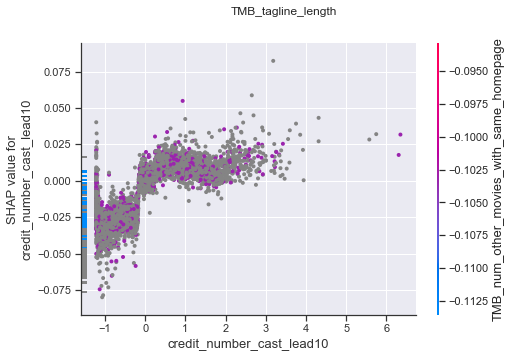

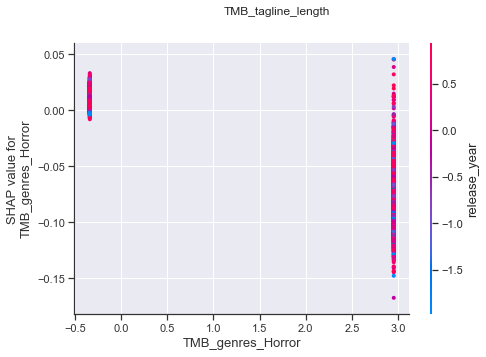

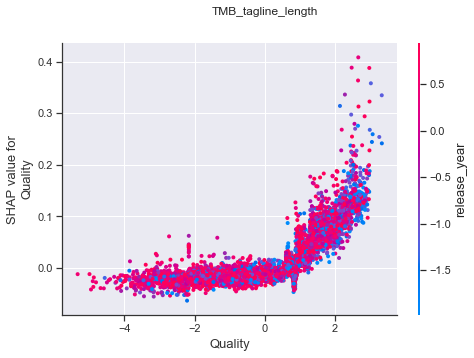

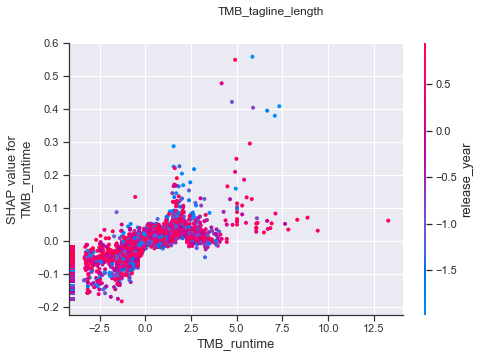

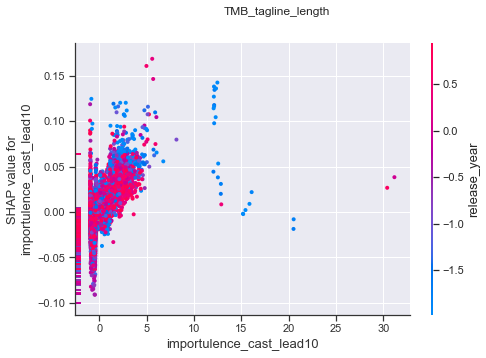

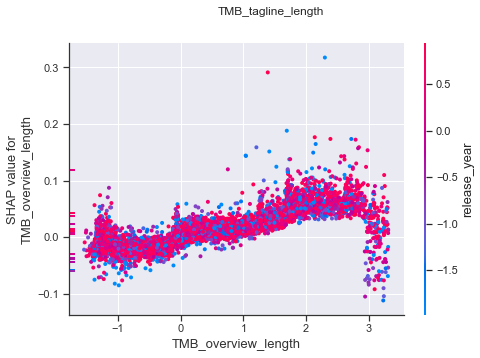

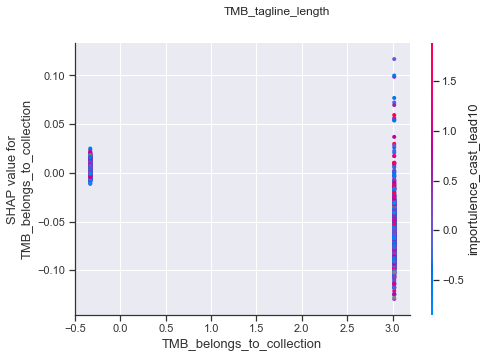

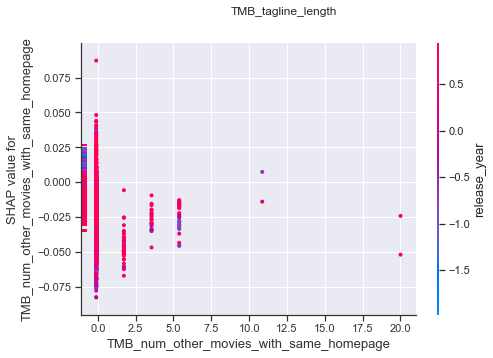

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique


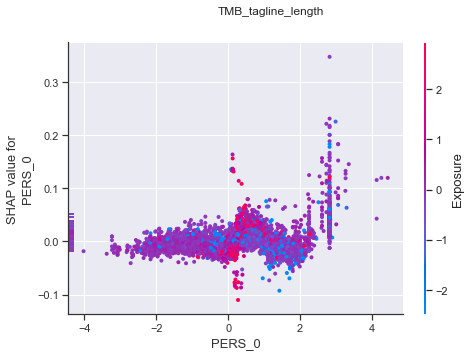

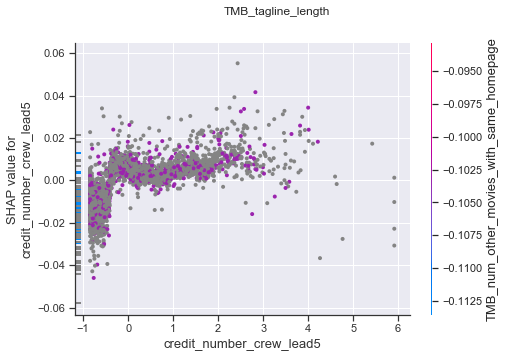

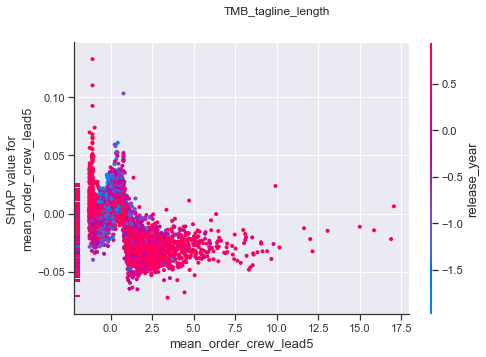

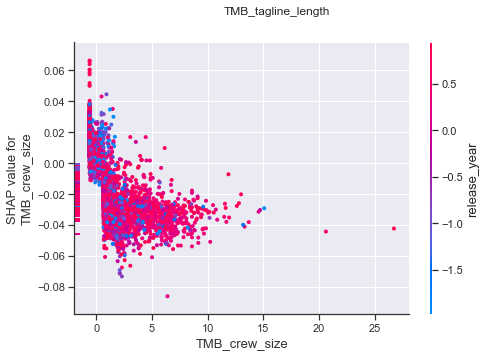

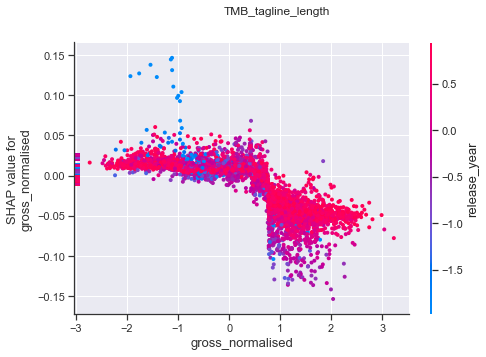

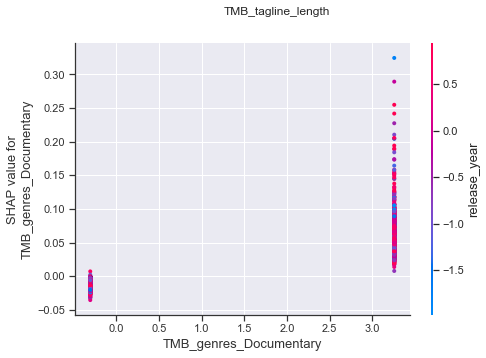

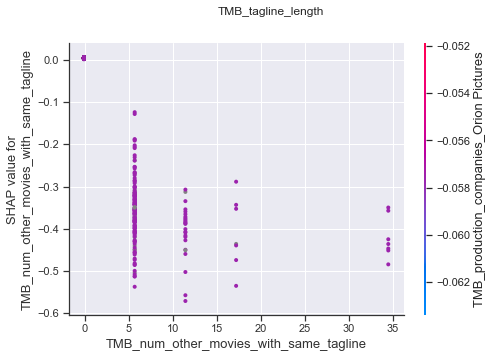

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique


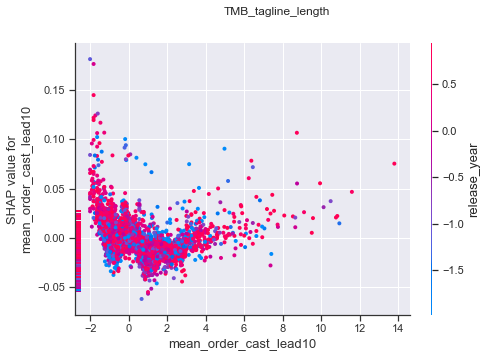

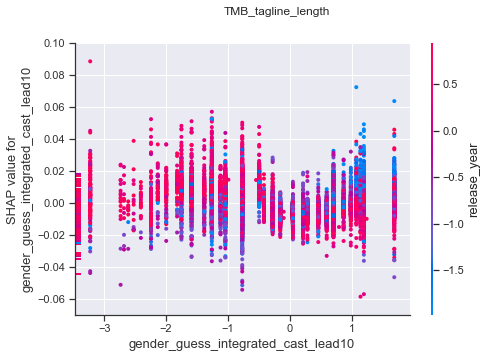

Warning, filename truncated because it was over 30. Filenames may no longer be unique
Warning, filename truncated because it was over 30. Filenames may no longer be unique


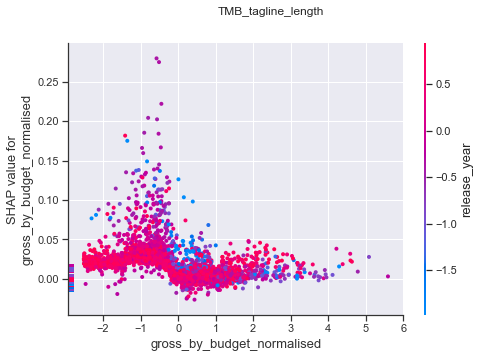

Wall time: 14min 5s


In [16]:
%%time
global BES_output_folder
drop_cols = []
Treatment = "xgboost_numerical_only_with_agg_crew_cast_data_with_fusion_data"

# drop_cols.extend(fused_cols)

# drop_cols.extend(["release_year","gross_normalised",
#                   "TMB_num_other_movies_with_same_homepage"]) # inflation is cheating!
var_name = "TMB_tagline_length"


BES_output_folder= ".."+os.sep+"Output"+os.sep


df = INT_df_ord_only.drop(drop_cols,axis=1).copy()
drop_movies = df[df.isnull().all(axis=1)].index
df.drop(drop_movies,inplace=True)
# standardise data (subtract out the mean, divide through by standard deviation)
df = pd.DataFrame(           StandardScaler().fit_transform(df.values ),
                             columns = df.columns,
                             index   = df.index      )

mask = df[var_name].notnull()
df = df[mask]
colname = var_name
var_stub = var_name
var_list = [var_name]
var_stub_list = [var_stub]

(explainer, shap_values) = xgboost_run(subdir=colname,min_features = min(df.shape[1]-1,20),
           title = colname+"\n\nPredicts Low "+colname+" <---   ---> Predicts High "+colname, dependence_plots=True,
                                       output_folder=BES_output_folder,Treatment=Treatment)
